# Data Preprocessing



### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from pyecharts.charts import Bar
from pyecharts import options as opts
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
%matplotlib inline

### Loading the data

In [2]:
books_data = pd.read_csv('../data/books_data.csv')
ratings_data = pd.read_csv('../data/books_ratings_data.csv')
book_tags_data = pd.read_csv('../data/book_tags_data.csv')
tags_data = pd.read_csv('../data/tags_data.csv')

### Understanding the loaded data and checking shape

In [3]:
books_data.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
books_data.shape

(10000, 23)

In [5]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

### Understanding the null values in the dataset

In [6]:
books_data.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

<AxesSubplot:>

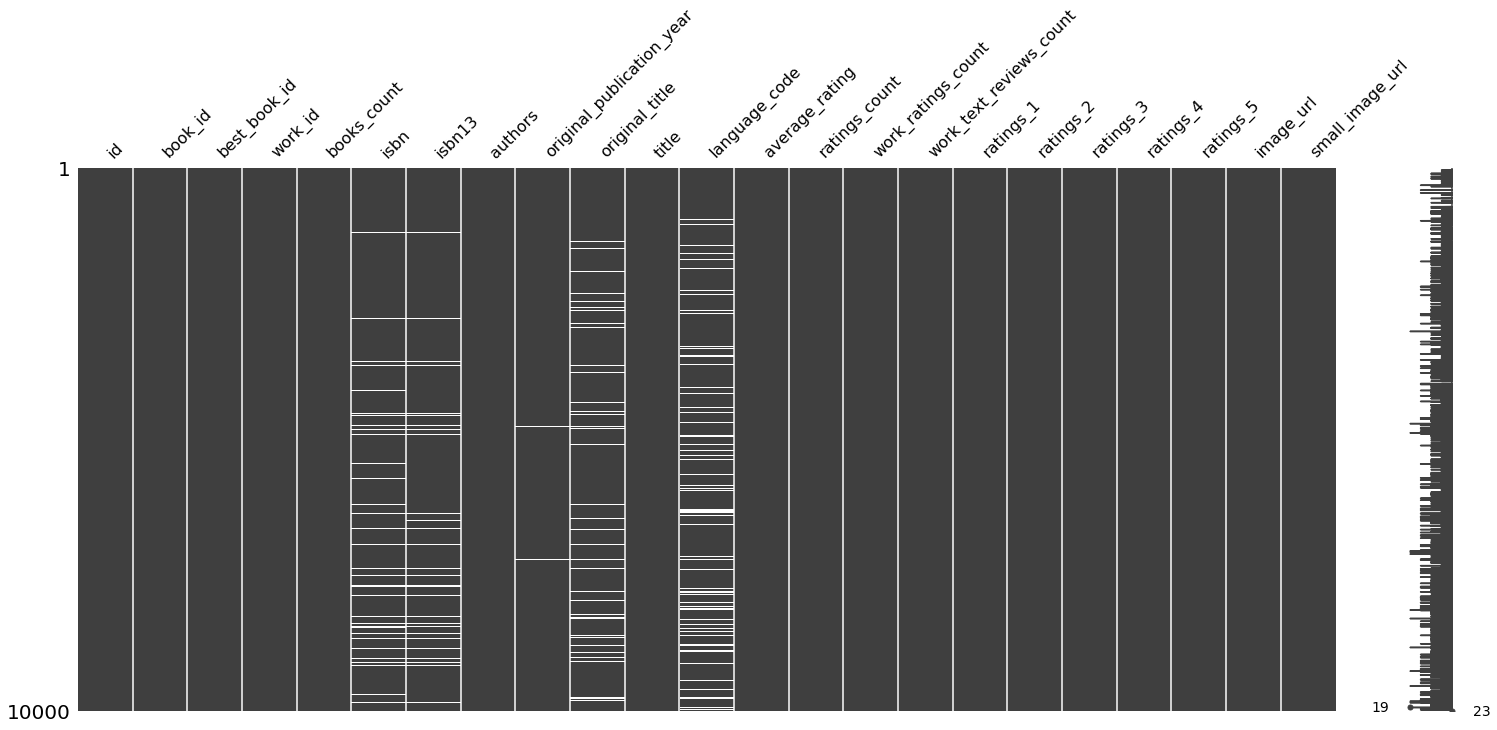

In [7]:
msno.matrix(books_data)

In [8]:
# old_names = ['id', 'book_id', 'best_book_id', 'work_id', 'books_count','isbn','isbn13','authors','original_publication_year','original_title'] 
# new_names = ['a', 'b', 'c', 'd', 'e']
# df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

In [9]:
ratings_data.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [10]:
ratings_data.shape

(981756, 3)

In [11]:
ratings_data.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [12]:
book_tags_data.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [13]:
book_tags_data.shape

(999912, 3)

In [14]:
book_tags_data.isnull().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

In [15]:
tags_data.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [16]:
tags_data.shape

(34252, 2)

In [17]:
tags_data.isnull().sum()

tag_id      0
tag_name    0
dtype: int64

## Data Exploratory Analysis

### Understanding the outliars using box plots

<AxesSubplot:>

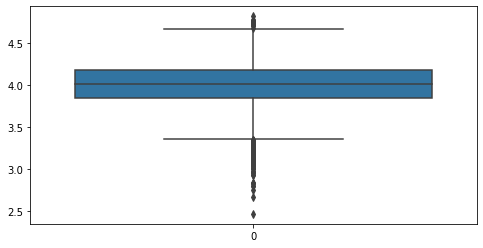

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(data=books_data['average_rating'])

<AxesSubplot:>

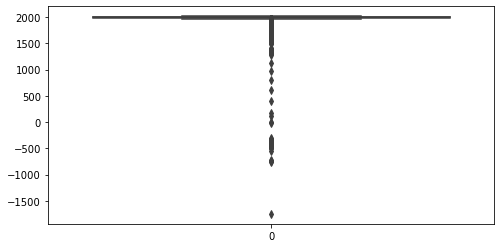

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(data=books_data['original_publication_year'])

### Sorting data according to the average ratings

In [20]:
sortedData = books_data[books_data['ratings_count']>=1500]
sortedData = sortedData.sort_values('average_rating', ascending=False)
sortedData.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3627,3628,24812,24812,25599,14,740748475,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,...,28900,29968,861,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...
3274,3275,8,8,21457576,11,439682584,9.780440e+12,"J.K. Rowling, Mary GrandPré",2003.0,NaN,...,33220,33424,156,317,233,978,3686,28210,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
861,862,17332218,17332218,16482835,34,765326361,9.780765e+12,Brandon Sanderson,2014.0,Words of Radiance,...,73572,108176,7261,154,404,2653,18272,86693,https://images.gr-assets.com/books/1391535251m...,https://images.gr-assets.com/books/1391535251s...
8853,8854,95602,95602,920037,6,842339523,9.780842e+12,Francine Rivers,1993.0,Mark of the Lion Trilogy,...,9081,9547,731,27,61,323,1363,7773,https://images.gr-assets.com/books/1349032180m...,https://images.gr-assets.com/books/1349032180s...
7946,7947,5031805,5031805,40769318,96,1433502410,9.781434e+12,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,NaN,...,8953,10784,262,98,90,367,1152,9077,https://images.gr-assets.com/books/1410151002m...,https://images.gr-assets.com/books/1410151002s...


Text(0, 0.5, 'Book Title')

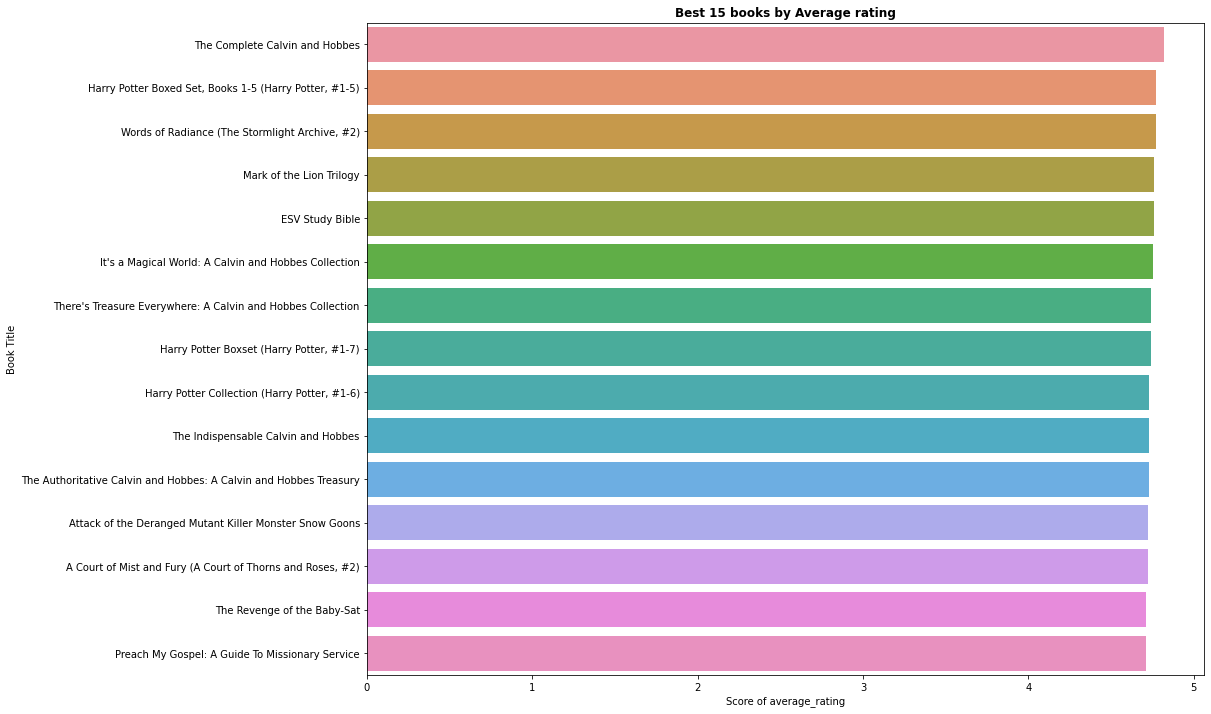

In [21]:
plt.figure(figsize=(15,12))
ax = sns.barplot(x=sortedData['average_rating'].head(15), y=sortedData['title'].head(15), data=sortedData)
plt.title('Best ' + str(15) + ' books by ' + 'average_rating'.replace('_',' ').capitalize(), weight='bold')
plt.xlabel('Score of ' + 'average_rating')
plt.ylabel('Book Title')

#### Top text reviewed books

In [25]:
book_sorted_reviews_count = books_data[books_data['ratings_count']>=1000].sort_values('work_text_reviews_count', ascending=False)
book_sorted_reviews_count[['title','authors','average_rating','ratings_count','work_text_reviews_count']].head(10)

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653,155254
5,The Fault in Our Stars,John Green,4.26,2346404,140739
29,Gone Girl,Gillian Flynn,4.03,512475,121614
11,"Divergent (Divergent, #1)",Veronica Roth,4.24,1903563,101023
19,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,4.03,1719760,96274
2,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,3866839,95009
46,The Book Thief,Markus Zusak,4.36,1159741,93611
60,The Girl on the Train,Paula Hawkins,3.88,1008778,93600
16,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,4.30,1831039,88538
30,The Help,Kathryn Stockett,4.45,1531753,78204


## Count of books written in different languages

In [26]:
langCounts = pd.DataFrame(books_data['language_code'].value_counts())
langCounts.columns = ['Total Counts']
langCounts = langCounts.sort_values('Total Counts', ascending=False)
langCounts

,Total Counts
eng,6341
en-US,2070
en-GB,257
ara,64
en-CA,58
fre,25
ind,21
spa,20
ger,13
per,7


In [27]:
len(langCounts)

25

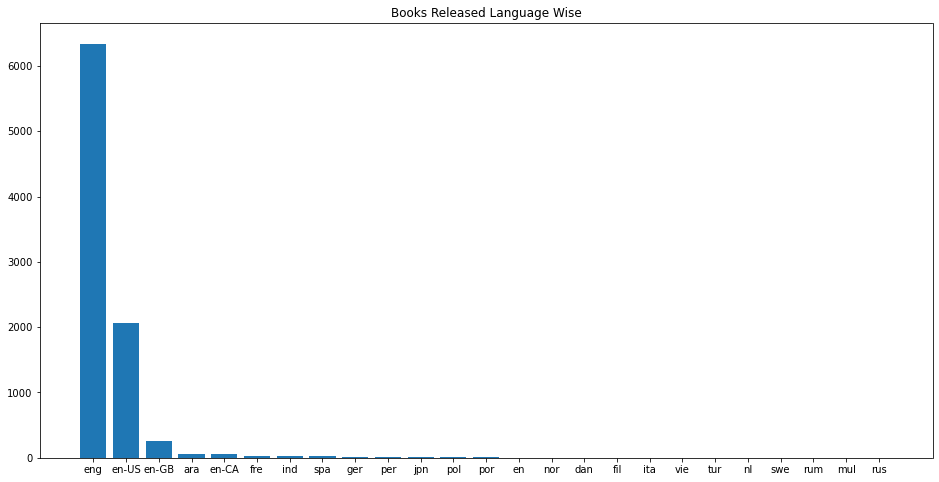

In [28]:
plt.figure(figsize=(16,8))
plt.title("Books Released Language Wise")
plt.bar(x=langCounts.index,height='Total Counts', data=langCounts);

In [29]:
langCounts = langCounts.drop(["en-US", "en-GB", "eng", "en-CA"])

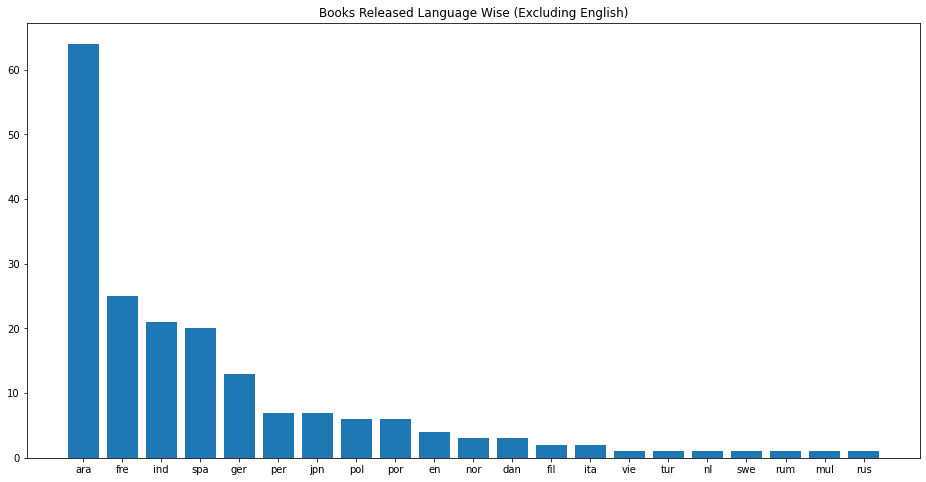

In [30]:
plt.figure(figsize=(16,8))
plt.title("Books Released Language Wise (Excluding English)")
plt.bar(x=langCounts.index,height='Total Counts', data=langCounts);

## Authors

In [31]:
books_data['authors'].value_counts()

Stephen King                                                                                                                                                                                                                              60
Nora Roberts                                                                                                                                                                                                                              59
Dean Koontz                                                                                                                                                                                                                               47
Terry Pratchett                                                                                                                                                                                                                           42
Agatha Christie                                     

In [32]:
DKBooks = []
books_data['authors'].apply(lambda p: DKBooks.append(p) if 'Dean Koontz' in p else [])
DKBooks

['Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Richard Paige, Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz, Kevin J. Anderson, Chuck Dixon, Brett Booth',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz, Kevin J. Anderson, Scott Brick',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Leigh Nichols, Dean Koontz',
 'Dean Koontz, Keith Szarabajka',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz, Leigh Nichols',
 'Dean Koontz',
 'Owen  West, Dean Koontz',
 'Dean Koontz',
 'Dean Koontz, Ed Gorman, John Bedford Lloyd',
 'Dean Koontz',
 'K.R. Dwyer, Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Dean Koontz',
 'Leigh Nichols, Dean Koontz',
 'Leig

In [33]:
len(DKBooks)

64

<Figure size 2016x720 with 0 Axes>

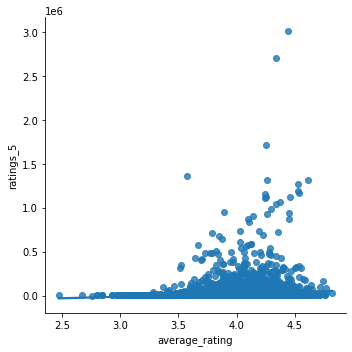

In [34]:
plt.figure(figsize=(28,10))
sns.lmplot(x='average_rating', y='ratings_5', data=books_data)